In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms.functional import to_tensor

In [2]:
train_set = MNIST('datasets', train=True, download=True, transform=to_tensor)
len(train_set)

60000

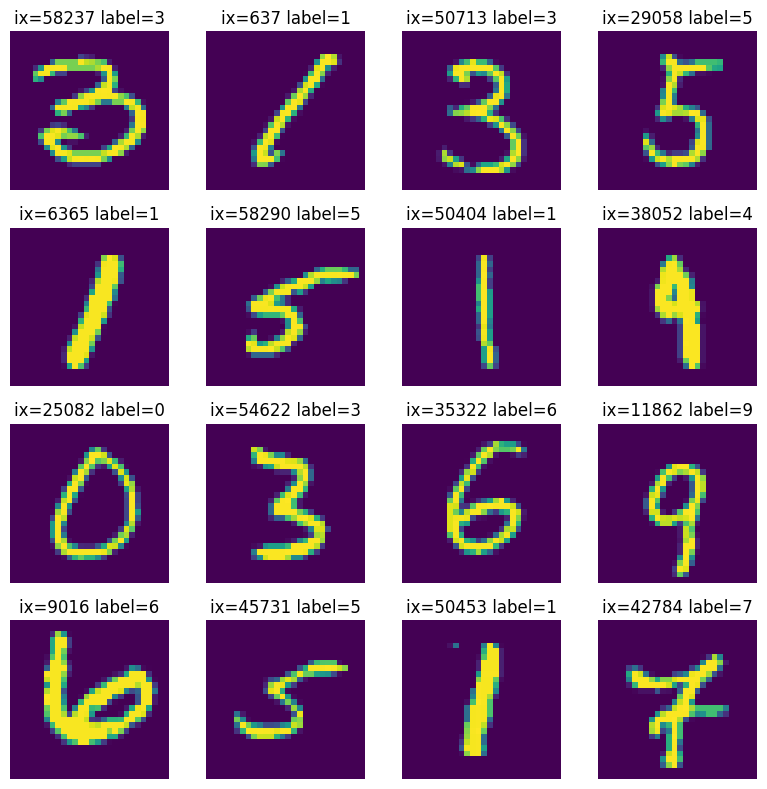

In [3]:
# See images in dataset
plt.figure(figsize=(8,8))
ixs = torch.randint(low=0, high=len(train_set), size=(16,)).tolist()
for i, ix in enumerate(ixs):
    img, label = train_set[ix]
    plt.subplot(4, 4, i+1)
    plt.imshow(torch.squeeze(img))
    plt.title(f'{ix=} {label=}')
    plt.axis('off')
plt.tight_layout()

In [4]:
encoder = nn.Sequential(
    nn.Linear(in_features=28*28, out_features=64),
    nn.ReLU(),
)

decoder = nn.Sequential(
    nn.Linear(in_features=64, out_features=28*28),
    nn.Sigmoid(),
)

net = nn.Sequential(encoder, decoder)
net

Sequential(
  (0): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
  )
  (1): Sequential(
    (0): Linear(in_features=64, out_features=784, bias=True)
    (1): Sigmoid()
  )
)

In [5]:
# Train the network
epochs = 20
train_loader = DataLoader(train_set, batch_size=256)
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

net.train()
for epoch in range(1, epochs+1):
    running_loss = 0
    for i, (images, _) in enumerate(train_loader):
        optimizer.zero_grad()

        inputs = torch.flatten(images, start_dim=1)
        outputs = net(inputs)
        loss = nn.functional.mse_loss(outputs, target=inputs)
        loss.backward()

        optimizer.step()

        running_loss += loss.item()
    
    print(f'Epoch {epoch} completed! Avg loss: {running_loss/len(train_loader)}')

Epoch 1 completed! Avg loss: 0.06555474276872392
Epoch 2 completed! Avg loss: 0.033310634040452064
Epoch 3 completed! Avg loss: 0.024552308815590878
Epoch 4 completed! Avg loss: 0.019139267809371998
Epoch 5 completed! Avg loss: 0.015654503740370272
Epoch 6 completed! Avg loss: 0.013234315804661589
Epoch 7 completed! Avg loss: 0.011435048551635539
Epoch 8 completed! Avg loss: 0.010056624026533137
Epoch 9 completed! Avg loss: 0.00899846199701758
Epoch 10 completed! Avg loss: 0.008179731704690989
Epoch 11 completed! Avg loss: 0.007554883755584981
Epoch 12 completed! Avg loss: 0.007074985902835714
Epoch 13 completed! Avg loss: 0.006704916422592198
Epoch 14 completed! Avg loss: 0.00642460981344289
Epoch 15 completed! Avg loss: 0.006215521439592889
Epoch 16 completed! Avg loss: 0.006055946331074897
Epoch 17 completed! Avg loss: 0.005925667963604978
Epoch 18 completed! Avg loss: 0.005820517295456313
Epoch 19 completed! Avg loss: 0.005739446164683458
Epoch 20 completed! Avg loss: 0.00567323724

In [6]:
images = torch.cat([img for img, _ in train_set])
labels = torch.tensor([label for _, label in train_set])
images.shape, labels.shape

(torch.Size([60000, 28, 28]), torch.Size([60000]))

In [7]:
net.eval()
with torch.no_grad():
    inputs = images.flatten(start_dim=1)
    latent_vecs = encoder(inputs)
latent_vecs.shape

torch.Size([60000, 64])

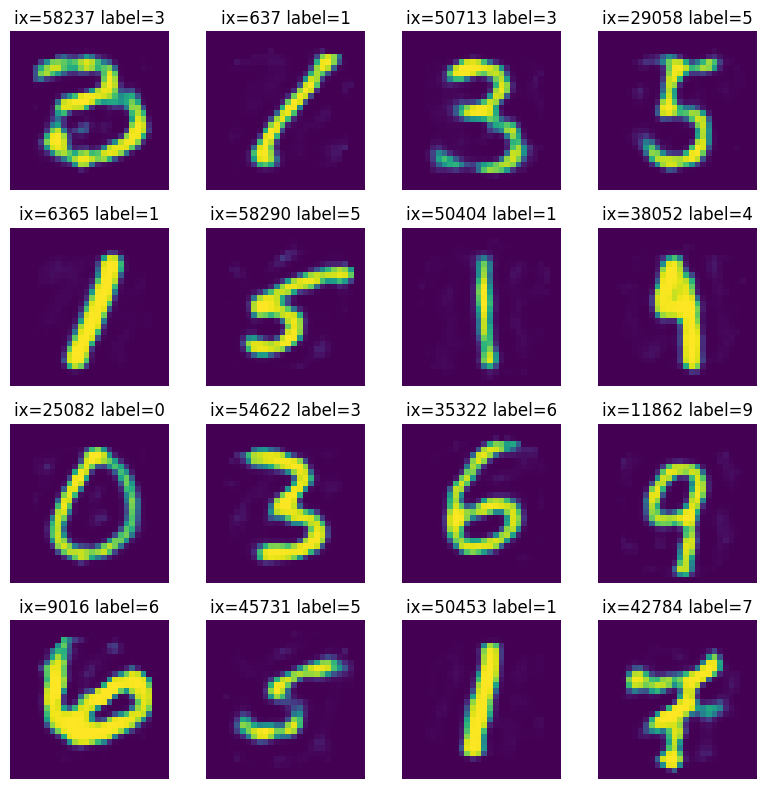

In [8]:
# See images from encoder
plt.figure(figsize=(8,8))
for i, ix in enumerate(ixs):
    with torch.no_grad():
        output = decoder(latent_vecs[ix])
    img = torch.reshape(output, (28, 28))
    label = labels[ix].item()

    plt.subplot(4, 4, i+1)
    plt.imshow(img)
    plt.title(f'{ix=} {label=}')
    plt.axis('off')
plt.tight_layout()

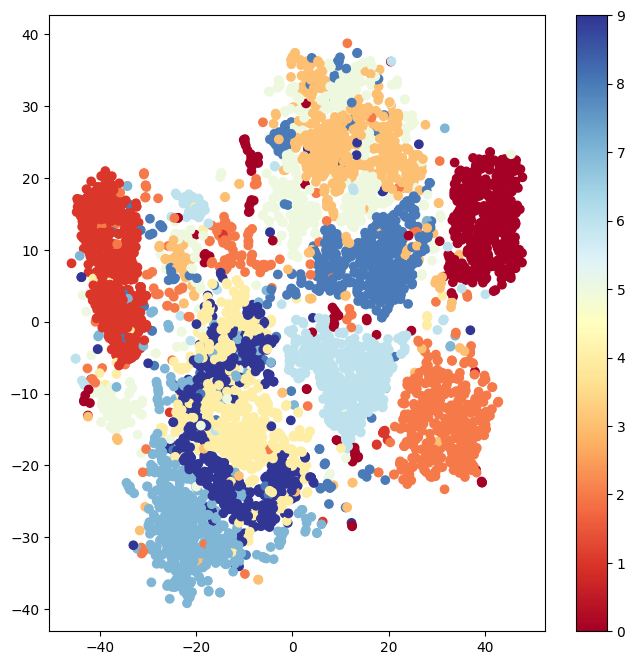

In [9]:
from matplotlib import colormaps
from sklearn.manifold import TSNE

tsne_indexes = torch.randint(low=0, high=len(train_set), size=(5000,))

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=100)
latent_tsne = tsne.fit_transform(latent_vecs[tsne_indexes])

cm = colormaps['RdYlBu']
plt.figure(figsize=(8,8))
sc = plt.scatter(latent_tsne[:, 0], latent_tsne[:, 1], c=labels[tsne_indexes], cmap=cm)
plt.colorbar(sc)
plt.show()